# Instalar os pacotes necessários

(Necessário apenas na primeira vez que utilizar tais pacotes)

In [1]:
#!pip install --upgrade pip
#!pip install requests_oauthlib

# Chamar os pacotes que serão utilizados ao longo do código

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import requests
import warnings
from time import gmtime, strftime
from requests_oauthlib import OAuth1Session

warnings.filterwarnings('ignore')

## Autenticação

In [3]:
#API_KEY = "9BGmFKNASlFUv7j7EVwVvUSOr"
#API_SECRET = "Z3TluNxqAmjIQoEoYU8Hh7fmEbWOKKcjYxaizBzYiK9HpZLv3N"
#ACCESS_TOKEN = "2678203501-jMwrB91mYDppQkqUOp3HGsJPT0GGvyPERhQaxpy"
#ACCESS_TOKEN_SECRET = "TUgbMAL53Jd9veKVti6de7f0c1LOmBVtnGEUmHgPPsdVW"

In [4]:
API_KEY = "XIlGfwgJX8ubCE7R5XxayaGN9"
API_SECRET = "BIh5wYEC8EWcBfdrP9qtKJOF4zg04hVOfxxAt4uZ7AVINeJJnt"
ACCESS_TOKEN = "2678203501-jZFsJjk0LO7dywVZRLcEZgC3jzZCn3XogPSpSPa"
ACCESS_TOKEN_SECRET = "MiAwMgECSMBNKhgecFVAxaQcK7wDxJdbroMgxEFzwimpY"

In [5]:
session = OAuth1Session(API_KEY, API_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

## Realizando a busca de fato

### Descobrindo como caracteres especiais devem ser utilizados na busca

In [6]:
TWITTER_URL = 'https://api.twitter.com/1.1/search/tweets.json'
url = TWITTER_URL+'?q=globoplay%20assedio&count=10' # concatenando 2 strings

response = session.get(url)
print(response.status_code)

200


Formas de concatenar STRING

In [7]:
"O nome dele é " + "Leonardo"

'O nome dele é Leonardo'

In [8]:
"Ele tem "+10+" anos"

TypeError: can only concatenate str (not "int") to str

In [9]:
"Ele tem {} anos".format(10)

'Ele tem 10 anos'

E o retorno da API?

In [10]:
response.content

b'{"statuses":[{"created_at":"Thu Oct 18 12:47:17 +0000 2018","id":1052903947734802432,"id_str":"1052903947734802432","text":"RT @guedespri05: T\\u00f4 assistindo a s\\u00e9rie Ass\\u00e9dio da @RedeGlobo @globoplay !!! Adriana Esteves dando um show, o que j\\u00e1 \\u00e9 normal!! Totalmente s\\u2026","truncated":false,"entities":{"hashtags":[],"symbols":[],"user_mentions":[{"screen_name":"guedespri05","name":"Priscila Guedes","id":706481268649824257,"id_str":"706481268649824257","indices":[3,15]},{"screen_name":"RedeGlobo","name":"Globo","id":18219976,"id_str":"18219976","indices":[50,60]},{"screen_name":"globoplay","name":"globoplay","id":55569724,"id_str":"55569724","indices":[61,71]}],"urls":[]},"metadata":{"iso_language_code":"pt","result_type":"recent"},"source":"\\u003ca href=\\"http:\\/\\/twitter.com\\/download\\/android\\" rel=\\"nofollow\\"\\u003eTwitter for Android\\u003c\\/a\\u003e","in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"i

In [11]:
print(requests.utils.quote("globoplay assedio"))

globoplay%20assedio


In [12]:
print(requests.utils.quote("#globoplay"))

%23globoplay


### Trabalhando os dados retornados

In [13]:
result_json = json.loads(response.content)
print(result_json.keys())

dict_keys(['statuses', 'search_metadata'])


In [14]:
tweets = result_json['statuses']

In [15]:
print(len(tweets))

10


In [16]:
print(type(tweets[0]))

<class 'dict'>


In [17]:
print(tweets[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])


In [18]:
print(tweets[5]['text'])

RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)
'A…


In [19]:
print(tweets[5]['user'].keys())

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])


In [20]:
print(tweets[1]['user']['name'])

Lauretina 13


## Paginando as buscas

Como se fosse o resultado de uma busca no Google

* Os primeiros 10 resultados são exibidos

* Importante lembrar que o twitter retorna as mensagens ordenadas da mais recente para a mais antiga,
  e os IDs das mensagens são retornados do maior ID para o menor ID.
https://developer.twitter.com/en/docs/tweets/timelines/guides/working-with-timelines.html

* Para ver a próxima página, é necessário informar o menor ID-1 retornado na busca anterior 



In [21]:
result_json['search_metadata']

{'completed_in': 0.053,
 'max_id': 1052903947734802432,
 'max_id_str': '1052903947734802432',
 'next_results': '?max_id=1052766793989849093&q=globoplay%20assedio&count=10&include_entities=1',
 'query': 'globoplay+assedio',
 'refresh_url': '?since_id=1052903947734802432&q=globoplay%20assedio&include_entities=1',
 'count': 10,
 'since_id': 0,
 'since_id_str': '0'}

In [22]:
next_results = result_json['search_metadata']['next_results']
next_results

'?max_id=1052766793989849093&q=globoplay%20assedio&count=10&include_entities=1'

In [23]:
response = session.get(TWITTER_URL+next_results)
print(response.status_code)

200


## Recapitulando ...

In [43]:
# Método para conferir que o menor ID está na última posição e o maior ID está na primeira posição
def get_ids(tweets):
    min_id = 0
    max_id = 0
    for i, tweet in enumerate(tweets):
        if tweet['id'] > max_id:
            max_id = tweet['id']
            print('Maximo na posicao {} => {}'.format(i, max_id))
        if tweet['id'] < max_id:
            min_id = tweet['id']
            print('Minimo na posicao {} => {}'.format(i, min_id))  
    return min_id, max_id

# Método para obter a paginação de forma manual
def get_next_results(tweets, url):
    #min_id, max_id = get_ids(result_json['statuses'])
    max_id = tweets[0]['id']
    min_id = tweets[-1]['id']
    return '{}&max_id={}'.format(url, min_id-1)

In [45]:
# Constantes
TWITTER_URL = 'https://api.twitter.com/1.1/search/tweets.json' # STRING
SEARCH_URL = '?q=globoplay%20assedio&count=100'
N_PAGES = 50

# Variáveis
next_results = SEARCH_URL # STRING
page = 1    # INTEIRO
tweets = [] # LISTA

while next_results is not None and page < N_PAGES: # LOOP
    print("##############")

    response = session.get(TWITTER_URL+next_results)
    if response.status_code != 200:
        print("A página retornou código {}".format(response.status_code))
        break        
    result_json = json.loads(response.content)   

    if not len(result_json['statuses']):
        print("Nenhum tweet retornado")
        break
    tweets_json = result_json['statuses']
    print("Dados carregados - página {} => {} tweets".format(page, len(tweets_json)))

    # Paginação usando o resultado do JSON
    if 'next_results' in result_json['search_metadata']:
        next_results = result_json['search_metadata']['next_results']
    else:
        #next_results = None
        next_results = get_next_results(tweets_json, SEARCH_URL)
    print(next_results)

    page = page+1
    
    # Carregando os resultados
    tweets.extend(tweets_json)

##############
Dados carregados - página 1 => 100 tweets
?max_id=1052689800027869183&q=globoplay%20assedio&count=100&include_entities=1
##############
Dados carregados - página 2 => 96 tweets
?q=globoplay%20assedio&count=100&max_id=1052076655437582335
##############
Dados carregados - página 3 => 100 tweets
?max_id=1052029509644558335&q=globoplay%20assedio&count=100&include_entities=1
##############
Dados carregados - página 4 => 100 tweets
?max_id=1052023690374914047&q=globoplay%20assedio&count=100&include_entities=1
##############
Dados carregados - página 5 => 100 tweets
?max_id=1052021910844960767&q=globoplay%20assedio&count=100&include_entities=1
##############
Dados carregados - página 6 => 100 tweets
?max_id=1052018352921726976&q=globoplay%20assedio&count=100&include_entities=1
##############
Dados carregados - página 7 => 100 tweets
?max_id=1052013202442207232&q=globoplay%20assedio&count=100&include_entities=1
##############
Dados carregados - página 8 => 100 tweets
?max_id=105

## Transformando a lista de Tweets em uma estrutura do pandas (Dataframe)

In [46]:
df = pd.DataFrame(tweets)
df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Thu Oct 18 14:24:21 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'QuebrandoOTabu', 'name': 'Quebrando o Tabu', 'id': 283230411, 'id_str': '283230411', 'indices': [3, 18]}], 'urls': []}",NaN,0,False,None,1052928372479791105,1052928372479791105,...,NaN,NaN,NaN,149,False,"{'created_at': 'Wed Oct 17 22:30:00 +0000 2018', 'id': 1052688203981905920, 'id_str': '1052688203981905920', 'text': 'Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️… https://t.co/PEmV4yzD8g', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/PEmV4yzD8g', 'expanded_url': 'https://twitter.com/i/web/status/1052688203981905920', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'pt', 'result_type': 'recent'}, 'source': '<a href=""https://ads-api.twitter.com"" rel=""nofollow"">Twitter Ads Composer</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 283230411, 'id_str': '283230411', 'name': 'Quebrando o Tabu', 'screen_name': 'QuebrandoOTabu', 'location': '', 'description': 'Por um mundo mais bem informado e menos careta.', 'url': 'https://t.co/3eHEO0OE49', 'entities': {'url': {'urls': [{'url': 'https://t.co/3eHEO0OE49', 'expanded_url': 'http://fb.com/quebrandootabu', 'display_url': 'fb.com/quebrandootabu', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 210035, 'friends_count': 172, 'listed_count': 451, 'created_at': 'Sat Apr 16 21:30:27 +0000 2011', 'favourites_count': 1529, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 3441, 'lang': 'pt', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '030303', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/965288877270470662/o6R48tXm_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/965288877270470662/o6R48tXm_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/283230411/1520991528', 'profile_link_color': 'FAB81E', 'profile_sidebar_border_color': 'EBEBEB', 'profile_sidebar_fill_color': '47413D', 'profile_text_color': 'CC2316', 'profile_use_background_image': True, 'has_extended_profile': False, 'default_profile': False, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}, 'geo': None, 'coordinates': None, 'place': None, 'contributors': None, 'is_quote_status': False, 'retweet_count': 149, 'favorite_count': 780, 'favorited': False, 'retweeted': False, 'possibly_sensitive': False, 'lang': 'pt'}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…",False,"{'id': 3787082609, 'id_str': '3787082609', 'name': 'bárbara', 'screen_name': 'xbarbaraf', 'location': 'but loving u had consequences', 'description': 'everyday, forever, and always, only with you.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 718, 'friends_count': 729, 'listed_count': 2, 'created_at': 'Sat Sep 26 23:59:23 +0000 2015', 'favourites_count': 36550, 'utc_offse

### Salvando os dados em CSV para backup ou para trabalhar em excel, R, etc.

In [48]:
filename = 'Dados/tweets_globoplay_{}.csv'.format(strftime("%Y%m%d_%H%M%S", gmtime()))
df.to_csv(filename, index=False)
print(filename)

Dados/tweets_globoplay_20181018_142809.csv


In [ ]:
# Dados/tweets_globoplay_20181018_142809.csv
df2 = pd.read_csv('Dados/tweets_globoplay_20181018_141711.csv')
df2.head(10)

## Analisando o resultado

In [49]:
print('Quantidade de tweets únicos: {}'.format(len(df.id.unique())))
df.describe()

Quantidade de tweets únicos: 964


,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,964.000000,9.640000e+02,1.400000e+01,2.000000e+01,5.000000e+00,964.000000
mean,3.651452,1.051856e+18,1.051625e+18,1.857474e+17,1.052012e+18,62.320539
std,38.177169,7.212798e+14,9.483571e+14,3.839937e+17,2.521613e+12,55.942059
min,0.000000,1.049134e+18,1.049961e+18,1.499430e+07,1.052007e+18,0.000000
25%,0.000000,1.052013e+18,1.050823e+18,4.877290e+07,1.052012e+18,1.000000
50%,0.000000,1.052022e+18,1.052020e+18,9.770970e+07,1.052012e+18,69.000000
75%,0.000000,1.052041e+18,1.052370e+18,2.323256e+09,1.052013e+18,113.000000
max,780.000000,1.052928e+18,1.052415e+18,1.034006e+18,1.052014e+18,149.000000


### Selecionando as colunas desejadas.

In [50]:
df_created = df[['created_at', 'text']]
df_created.describe()

,created_at,text
count,964,964
unique,920,347
top,Tue Oct 16 02:23:16 +0000 2018,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…"
freq,3,122


### Verificando os tipos das colunas:

In [51]:
df_created.dtypes

created_at    object
text          object
dtype: object

### Convertendo a coluna de data (STRING) para uma coluna do tipo date

In [52]:
df_created['created_at'] = pd.to_datetime(df_created['created_at'])
df_created.dtypes

created_at    datetime64[ns]
text          object        
dtype: object

In [53]:
pd.set_option('display.max_colwidth', -1)
df_created.head(10)

,created_at,text
0,2018-10-18 14:24:21,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…"
1,2018-10-18 14:09:46,RT @ETerminamos: Os vários atos criminosos cometidos por Roger Abdelmassih #NaoforamAssédiosForamEstupros\n#Assédio #globoplay #SegundaDetr…
2,2018-10-18 12:47:17,"RT @guedespri05: Tô assistindo a série Assédio da @RedeGlobo @globoplay !!! Adriana Esteves dando um show, o que já é normal!! Totalmente s…"
3,2018-10-18 12:45:24,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…"
4,2018-10-18 12:12:54,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…"
5,2018-10-18 11:51:46,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…"
6,2018-10-18 10:28:36,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…"
7,2018-10-18 10:25:51,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…"
8,2018-10-18 09:15:54,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…"
9,2018-10-18 09:09:00,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…"


### Visualizando os dados por dia.

Lembrando que esta API traz os resultados dos últimos 7 dias.

In [54]:
df_created['day'] = df_created['created_at'].dt.day
df_created.head()

,created_at,text,day
0,2018-10-18 14:24:21,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…",18
1,2018-10-18 14:09:46,RT @ETerminamos: Os vários atos criminosos cometidos por Roger Abdelmassih #NaoforamAssédiosForamEstupros\n#Assédio #globoplay #SegundaDetr…,18
2,2018-10-18 12:47:17,"RT @guedespri05: Tô assistindo a série Assédio da @RedeGlobo @globoplay !!! Adriana Esteves dando um show, o que já é normal!! Totalmente s…",18
3,2018-10-18 12:45:24,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…",18
4,2018-10-18 12:12:54,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…",18


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1247e7898>]],
      dtype=object)

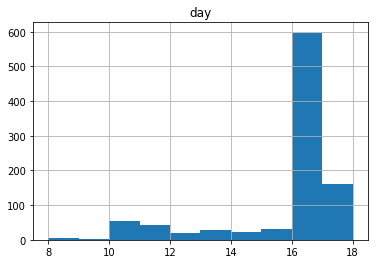

In [55]:
df_created.hist()

### Visualizando os dados dos dias 15 e 16 por horário

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120d3e198>,
      dtype=object)

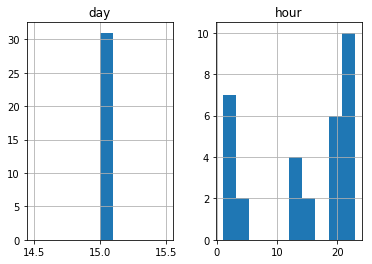

In [56]:
df_created_15 = df_created[df_created['created_at'].dt.day == 15]
df_created_15['hour'] = df_created_15['created_at'].dt.hour
df_created_15.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124805fd0>,
      dtype=object)

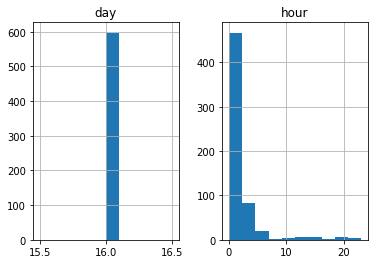

In [57]:
df_created_16 = df_created[df_created['created_at'].dt.day == 16]
df_created_16['hour'] = df_created_16['created_at'].dt.hour
df_created_16.hist()